# Тестовые задания по Data Science

### Общие требования
1. Используйте Python 3.x и разрешается не учитывать его Zen.
2. Код должен быть задокументирован в тех местах, которые кандидат считает не очевидными.
3. Все упоминаемые в заданиях файлы автор создает сам и к тетрадке при отправке не прикладывает.
4. Все импортирования библиотек должны находится в ячейках, которые используют эти библиотеки. То есть, если в ячейке используется библиотека numpy, значит в первых строках этой ячейки должен стоять `import numpy` или аналог.
5. Основной код каждого задания должен быть реализован в виде функции и затем вызван.
6. При отправке тетрадка должна содержать все результаты (output) выполнения ячеек. Не очищайте их!

Выполнение всех заданий не является обязательным требованием.

### Задание 1.
Визуализируйте два облака точек в $R^2$. Первое облако точек должно быть синего цвета, и должно  представлять собой выборку из нормального распределения с центром в точке $A(7,9)$ и ковариацинной матрицей $\Sigma=\left( \begin{array}{cc} 1 & 0 \\ 0 & 4 \\ \end{array} \right)$. Второе облако точек должно быть красного цвета и должно представлять собой выборку из нормального распределения с центром в точке $B(7,4)$ и ковариационной матрицей $\Sigma=\left( \begin{array}{cc} 4 & 0 \\ 0 & 1 \\ \end{array} \right)$. Каждое облако должно содержать по 100 точек. График должен визуализировать часть плоскости ограниченной квадратом $[0,15]\times[0,15]$.

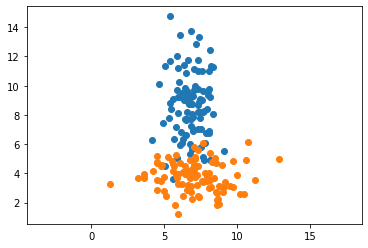

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
%matplotlib inline

def plot_clouds():
    mu_a = [7, 9]
    covmatrix_a = np.array([[1, 0], [0, 4]])
    cloud1 = mvn.rvs(mean=mu_a, cov=covmatrix_a, size=100)
    #cloud1 = np.random.multivariate_normal(mean=mu, cov = covmatrix_a, size=100)

    mu_b = [7, 4]
    covmatrix_b = np.array([[4, 0], [0, 1]])
    cloud2 = mvn.rvs(mean=mu_b, cov=covmatrix_b, size=100)

    plt.scatter(cloud1[:,0], cloud1[:,1])
    plt.scatter(cloud2[:,0], cloud2[:,1])
    #print(cloud1[:])
    #print(cloud1.shape)
    #print(cloud2[:])
    #print(cloud2.shape)
    plt.axis('equal')
    plt.show()

plot_clouds()

### Задание 2.

**Часть 1.** Напишите функцию `invert_permutation`, которая принимает на вход перестановку чисел [0, n] и возвращает обратную перестановку.

In [ ]:
#%%writefile funk.py
import random
import itertools
import json

data = [random.randint(0, 10) for i in range(3)]
print(data, ' <- original list')

permut = list(itertools.permutations(data))
print(permut, ' <- permutation list')

def invert_permutation(permut):
    for i in range(len(permut)):
        return permut[::-1]
print(invert_permutation(permut))

with open('permutations.json', 'w') as fname:
    json.dump(permut[::-1], fname, ensure_ascii=False)

[4, 9, 0]  <- original list
[(4, 9, 0), (4, 0, 9), (9, 4, 0), (9, 0, 4), (0, 4, 9), (0, 9, 4)]  <- permutation list
[(0, 9, 4), (0, 4, 9), (9, 0, 4), (9, 4, 0), (4, 0, 9), (4, 9, 0)]


**Часть 2.** Файл `permutations.json` содержит массив (list в python) перестановок. Гарантируется, что каждая перестановка является корректной и представляет собой массив. Перестановки в файле могут иметь разную длину. Пример:

```json
[
    [0,2,1,3],
    [0,3,4,1,2]
]
```
**Требуется**. Напишите функцию `test_invertion`, которая тестирует функцию `invert_permutation`. Эта функция принимает путь к json-файлу в формате описанном выше. Тестирование представляет собой применение функции `invert_permutation` к каждой перестановке из указанного файла, и последующую проверку корректности обращения перестановки. Также функция `test_inversion` должна напечатать отчет содержащий: количество успешных обращений, количество неуспешных, общее количество перестановок в файле `permutations.json`.

In [17]:
#%load funk.py
import itertools, random
import json
from funk import invert_permutation

with open('permutations.json') as fname:
    myfile = json.load(fname)

print(myfile, ' <- invertpermutation list')
rezult = []

def test_inversion(myfile):
    for i in myfile:
        myfunc = invert_permutation(i)
        rezult.append(myfunc)
    print(rezult)
    print(len(rezult), ' <- count of permutations')
test_inversion(myfile)




[[0, 9, 4], [0, 4, 9], [9, 0, 4], [9, 4, 0], [4, 0, 9], [4, 9, 0]]  <- invertpermutation list
[[4, 9, 0], [9, 4, 0], [4, 0, 9], [0, 4, 9], [9, 0, 4], [0, 9, 4]]
6  <- count of permutations


### Задание 3.
Решите задачу классификации красного вина по качеству, используя возможности библиотеки sklearn. Датасет размещен [здесь](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv). Результатом работы вашего кода должно быть значение метрики accuracy, измеренное на не менее, чем 20% объектов датасета. Полученное значение метрики необходимо напечатать.

**Примечание:** Изучение датасета и выбор классификатора для лучшего решения, можно проводить в любом объеме, но в отправляемой тетрадке должно содержаться только построение лучшего классификатора с соблюдением всех требований.

In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

os.chdir('../Downloads/')
wine = pd.read_csv('winequality-red.csv', sep=';', header=0)
#print(wine.shape, ' <- dataset shape')
#print(wine.head)

wine['quality'].value_counts(normalize=True)
#print(wine['quality'].value_counts(normalize=True))

cls = wine['quality']
prznk = wine.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(prznk, cls, test_size=0.2, shuffle=True)

X_train.head()
X_test.head()
y_train.head()
y_test.head()

#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


y_train_bin = np_utils.to_categorical(y_train)
y_test_bin = np_utils.to_categorical(y_test)

#print(y_train_bin[0:].shape, ' <- y_train_bin')
#print(y_test_bin[0:].shape, ' <- y_test_bin')

def classify():
    model = Sequential()
    model.add(Dense(9, input_dim=11, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(9, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_bin, epochs=200, batch_size=10)

    scores = model.evaluate(X_test, y_test_bin)
    print("\n Accuracy: %.2f%%" % (scores[1]*100))
    
classify()

Epoch 1/200
128/128 [==============================] - 2s 4ms/step - loss: 1.7037 - accuracy: 0.3808
Epoch 2/200
128/128 [==============================] - 1s 4ms/step - loss: 1.2238 - accuracy: 0.4785
Epoch 3/200
128/128 [==============================] - 0s 3ms/step - loss: 1.1906 - accuracy: 0.4871
Epoch 4/200
128/128 [==============================] - 0s 4ms/step - loss: 1.1784 - accuracy: 0.4902
Epoch 5/200
128/128 [==============================] - 0s 3ms/step - loss: 1.1640 - accuracy: 0.4934
Epoch 6/200
128/128 [==============================] - 0s 3ms/step - loss: 1.1682 - accuracy: 0.4816
Epoch 7/200
128/128 [==============================] - 0s 4ms/step - loss: 1.1564 - accuracy: 0.4949
Epoch 8/200
128/128 [==============================] - 0s 4ms/step - loss: 1.1435 - accuracy: 0.4941
Epoch 9/200
128/128 [==============================] - 1s 5ms/step - loss: 1.1529 - accuracy: 0.4902
Epoch 10/200
128/128 [==============================] - 1s 5ms/step - loss: 1.1420 - accura

### Задание 4.

**Часть 1.** Напишите функцию реализующую двумерную свертку с квадратным ядром. Параметры функции: входной массив, ядро (kernel), шаг (stride), размер отступа (padding).

In [19]:
#%%writefile conv2d.py
from functools import reduce

def convolve(self, in_array, kernel, stride, padding):
    self.in_array=in_array,
    self.kernel=kernel,
    self.stride=stride,
    self.padding=padding

def kernel(x, h):
    if x % 2 == 0 and x==h:
        return x, h
    #if h % 2 == 0:
    #    return h

    


**Часть 2.** Напишите функцию, которая загрузит картинки из набора 'digits' (sklearn.datasets) и визуализирует работу функции `convolve`. Визуализация представляет собой набор изображений из 5 рядов по 10 картинок в каждом. Первый ряд должен демонстрировать первые 10 картинок из набора 'digits'. Второй ряд визуализирует результат свертки с ядром $k=\frac{1}{3} \left( \begin{array}{ccc} 0 & 1 & 0 \\ 0 & 1 & 0 \\ 0 & 1 & 0 \end{array} \right)$, шагом `stride=1` и отступом `padding=1` к этим картинкам. Третий ряд должен визуализировать применение  точно такой же свертки к картинкам из предшествующего ряда. Аналогично четвертый и пятый ряды. Визуализация должна быть выполнена в серой цветовой палитре (colormap).

(1797, 64)


<Figure size 432x288 with 0 Axes>

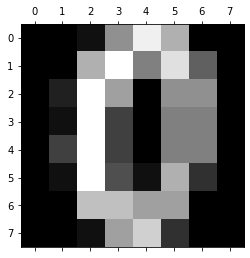

In [19]:
#%load conv2d.py
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from conv2d import convolve

def show_convolutions():
    digits = sklearn.datasets.load_digits()
    
    #print(digits.data.shape)
    #plt.gray()
    #plt.matshow(digits.images[10])
    #plt.show()

    


 
show_convolutions()